# Excercise_4
 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Movies_v1.csv file contains data about movies extracted from the BoxOffice database

In [2]:
pd.set_option('display.max_columns', None)
movies = pd.read_csv("../../Data/Movies_v1.csv")
movies.head()

,movie_id,original_title,revenue,budget,popularity,actors_cnt,original_language,language_en,language_fr,language_es,language_de,language_ru,language_it,language_ja,release_date,release_year,release_month,release_week,release_weekday,runtime,runtime_intervals,runtime_cat,is_collection,keywords_cnt,crew_total_cnt,crew_writing_cnt,crew_directing_cnt,crew_art_cnt,crew_sound_cnt,crew_costume_makeup_cnt,crew_visual_effects_cnt,crew_production_cnt,crew_actors_cnt,crew_camera_cnt,crew_lighting_cnt,crew_editing_cnt,sw_genre_action,sw_genre_adventure,sw_genre_animation,sw_genre_comedy,sw_genre_crime,sw_genre_documentary,sw_genre_drama,sw_genre_family,sw_genre_fantasy,sw_genre_foreign,sw_genre_history,sw_genre_horror,sw_genre_music,sw_genre_mystery,sw_genre_romance,sw_genre_science_fiction,sw_genre_thriller,sw_genre_tv_movie,sw_genre_war,sw_genre_western,genres_total,actor0_avg_revenue,actor0_avg_revenue_5y,actor0_blockbusters,actor0_blockbusters_5y,actor0_movies,actor0_movies_5y,actor0_gender,actor1_avg_revenue,actor1_avg_revenue_5y,actor1_blockbusters,actor1_blockbusters_5y,actor1_movies,actor1_movies_5y,actor1_gender,actor2_avg_revenue,actor2_avg_revenue_5y,actor2_blockbusters,actor2_blockbusters_5y,actor2_movies,actor2_movies_5y,actor2_gender,all_directors_avg_revenue,all_directors_avg_blockbusters,all_directors_avg_revenue_5y,all_directors_avg_blockbusters_5y,all_producers_avg_revenue,all_producers_avg_blockbusters,all_producers_avg_revenue_5y,all_producers_avg_blockbusters_5y
0,1,Hot Tub Time Machine 2,12314651.0,14000000,6.575393,24,en,1,0,0,0,0,0,0,2015-02-20,2015.0,2.0,8.0,6.0,93.0,9.0,Intermediate,0,4,72.0,2.0,4.0,12.0,10.0,0.0,0.0,9.0,0.0,8.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53164966.0,71823535.0,2.0,2.0,5.0,3.0,2.0,46134285.0,15843947.0,1.0,0.0,7.0,3.0,2.0,55244499.0,36507326.0,2.0,0.0,6.0,2.0,2.0,33274115.0,0.0,30658668.0,0.0,101192633.0,1.0,12314651.0,0.0
1,2,The Princess Diaries 2: Royal Engagement,95149435.0,40000000,8.248895,20,en,1,0,0,0,0,0,0,2004-08-06,2004.0,8.0,32.0,6.0,113.0,11.0,Intermediate,0,4,9.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,311294147.0,500188435.0,6.0,1.0,7.0,1.0,1.0,75729062.0,NaN,4.0,0.0,7.0,0.0,1.0,83349050.0,72927633.0,4.0,1.0,9.0,2.0,2.0,113707282.0,3.0,48418160.0,0.0,118162119.0,2.0,NaN,0.0
2,3,Whiplash,13092000.0,3300000,64.299990,51,en,1,0,0,0,0,0,0,2014-10-10,2014.0,10.0,41.0,6.0,105.0,11.0,Intermediate,0,12,64.0,1.0,3.0,5.0,9.0,0.0,0.0,18.0,0.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54445557.0,64308856.0,2.0,2.0,6.0,5.0,2.0,96743556.0,185404757.0,9.0,1.0,25.0,6.0,2.0,31820076.0,31820076.0,0.0,0.0,2.0,2.0,1.0,13092000.0,0.0,13092000.0,0.0,43944921.8,2.0,31450731.5,1.0
3,4,Kahaani,16000000.0,1200000,3.174936,7,hi,0,0,0,0,0,0,0,2012-03-09,2012.0,3.0,10.0,6.0,122.0,12.0,Long,0,7,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,10050000.0,NaN,0.0,0.0,2.0,0.0,1.0,7083026.0,2624539.0,0.0,0.0,3.0,2.0,2.0,16000000.0,NaN,0.0,0.0,1.0,0.0,0.0,16000000.0,0.0,NaN,0.0,16000000.0,0.0,NaN,0.0
4,5,????,3923970.0,0,1.148070,4,ko,0,0,0,0,0,0,0,2009-02-05,2009.0,2.0,6.0,5.0,118.0,12.0,Intermediate,0,0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3923970.0,NaN,0.0,0.0,1.0,0.0,2.0,1963155.0,2340.0,0.0,0.0,2.0,1.0,2.0,3923970.0,NaN,0.0,0.0,1.0,0.0,2.0,3923970.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN



## Exploratory data analysis:



#### Data Set types :

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 86 columns):
movie_id                             7398 non-null int64
original_title                       7398 non-null object
revenue                              3000 non-null float64
budget                               7398 non-null int64
popularity                           7398 non-null float64
actors_cnt                           7398 non-null int64
original_language                    7398 non-null object
language_en                          7398 non-null int64
language_fr                          7398 non-null int64
language_es                          7398 non-null int64
language_de                          7398 non-null int64
language_ru                          7398 non-null int64
language_it                          7398 non-null int64
language_ja                          7398 non-null int64
release_date                         7397 non-null object
release_year                   

#### 1. Describe the data with descriptive statistics (use concentration and dispersion indices)

In [4]:
pd.set_option('display.max_columns', None)
movies.describe()


,movie_id,revenue,budget,popularity,actors_cnt,language_en,language_fr,language_es,language_de,language_ru,language_it,language_ja,release_year,release_month,release_week,release_weekday,runtime,runtime_intervals,is_collection,keywords_cnt,crew_total_cnt,crew_writing_cnt,crew_directing_cnt,crew_art_cnt,crew_sound_cnt,crew_costume_makeup_cnt,crew_visual_effects_cnt,crew_production_cnt,crew_actors_cnt,crew_camera_cnt,crew_lighting_cnt,crew_editing_cnt,sw_genre_action,sw_genre_adventure,sw_genre_animation,sw_genre_comedy,sw_genre_crime,sw_genre_documentary,sw_genre_drama,sw_genre_family,sw_genre_fantasy,sw_genre_foreign,sw_genre_history,sw_genre_horror,sw_genre_music,sw_genre_mystery,sw_genre_romance,sw_genre_science_fiction,sw_genre_thriller,sw_genre_tv_movie,sw_genre_war,sw_genre_western,genres_total,actor0_avg_revenue,actor0_avg_revenue_5y,actor0_blockbusters,actor0_blockbusters_5y,actor0_movies,actor0_movies_5y,actor0_gender,actor1_avg_revenue,actor1_avg_revenue_5y,actor1_blockbusters,actor1_blockbusters_5y,actor1_movies,actor1_movies_5y,actor1_gender,actor2_avg_revenue,actor2_avg_revenue_5y,actor2_blockbusters,actor2_blockbusters_5y,actor2_movies,actor2_movies_5y,actor2_gender,all_directors_avg_revenue,all_directors_avg_blockbusters,all_directors_avg_revenue_5y,all_directors_avg_blockbusters_5y,all_producers_avg_revenue,all_producers_avg_blockbusters,all_producers_avg_revenue_5y,all_producers_avg_blockbusters_5y
count,7398.000000,3.000000e+03,7.398000e+03,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7397.000000,7397.000000,7397.000000,7397.000000,7392.000000,7392.000000,7398.000000,7398.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.0,7360.0,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,5.934000e+03,3.588000e+03,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5.878000e+03,3.161000e+03,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5.736000e+03,2.845000e+03,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5.513000e+03,5513.000000,1.657000e+03,5513.000000,4.958000e+03,4958.000000,2.494000e+03,4958.000000
mean,3699.500000,6.672585e+07,2.260146e+07,8.514968,19.129630,0.858475,0.026899,0.012841,0.006623,0.014734,0.007570,0.012165,1999.677031,6.842909,28.214411,4.963904,107.717262,10.830628,0.027845,7.256150,24.400815,2.218614,1.663723,2.699728,3.056658,0.0,0.0,5.288995,0.000679,1.797418,0.425136,1.512908,0.235254,0.151322,0.051797,0.353220,0.146983,0.029966,0.498441,0.091525,0.085153,0.011390,0.040000,0.099661,0.036203,0.074576,0.194576,0.100881,0.253424,0.000136,0.032949,0.015864,2.503322,1.021727e+08,1.710441e+08,3.560499,0.651837,8.507415,1.392147,1.668015,9.351582e+07,1.616335e+08,2.579449,0.513100,6.638653,1.178122,1.468697,9.001136e+07,1.502975e+08,2.219142,0.444212,5.897838,1.047943,1.487448,7.427380e+07,0.928895,1.161136e+08,0.144567,9.026067e+07,1.567568,1.348382e+08,0.261799
std,2135.762978,1.375323e+08,3.694867e+07,12.165794,17.777616,0.348586,0.161800,0.112597,0.081120,0.120493,0.086679,0.109632,15.370147,3.386287,14.784315,1.449966,21.480040,2.165771,0.164541,6.275023,28.157965,1.627544,1.365062,4.114980,4.512479,0.0,0.0,5.268008,0.030834,2.586904,1.234043,1.736821,0.424186,0.358387,0.221631,0.478003,0.354113,0.170505,0.500031,0.288374,0.279127,0.106121,0.195972,0.299568,0.186809,0.262724,0.395901,0.301192,0.435001,0.011644,0.178516,0.124959,1.112085,1.002851e+08,2.262900e+08,3.545276,1.036881,6.361056,1.608195,0.567088,9.878081e+07,2.312369e+08,2.895033,0.921681,5.540460,1.505845,0.627450,1.036156e+08,2.176075e+08,2.658852,0.854971,5.148063,1.446387,0.646241,1.172998e+08,1.510734,1.906442e+08,0.439723,1.145239e+08,2.418611,1.838122e+

#### 2. Graphs depicting the behavior of each variable.


In [5]:
import sweetviz as sv

#analyzing the dataset
advert_report = sv.analyze(movies)

#display the report
advert_report.show_html('movies_eda_before_cleansing.html')

ModuleNotFoundError: No module named 'sweetviz'

##### Link to the dataset analyze output made with sweetviz library: 

In [6]:
from IPython.display import FileLink
FileLink('movies_eda_before_cleansing.html')

C:\Users\yuryt\Documents\DataScience\stats\Statistics_excercise\movies_eda_before_cleansing.html

#### 3. Correlation matrix presented with seaborn heatmap (filtered to show corellations bigger than 0.5)

In [7]:
corrMatrix = movies.corr()
corrMatrix

,movie_id,revenue,budget,popularity,actors_cnt,language_en,language_fr,language_es,language_de,language_ru,language_it,language_ja,release_year,release_month,release_week,release_weekday,runtime,runtime_intervals,is_collection,keywords_cnt,crew_total_cnt,crew_writing_cnt,crew_directing_cnt,crew_art_cnt,crew_sound_cnt,crew_costume_makeup_cnt,crew_visual_effects_cnt,crew_production_cnt,crew_actors_cnt,crew_camera_cnt,crew_lighting_cnt,crew_editing_cnt,sw_genre_action,sw_genre_adventure,sw_genre_animation,sw_genre_comedy,sw_genre_crime,sw_genre_documentary,sw_genre_drama,sw_genre_family,sw_genre_fantasy,sw_genre_foreign,sw_genre_history,sw_genre_horror,sw_genre_music,sw_genre_mystery,sw_genre_romance,sw_genre_science_fiction,sw_genre_thriller,sw_genre_tv_movie,sw_genre_war,sw_genre_western,genres_total,actor0_avg_revenue,actor0_avg_revenue_5y,actor0_blockbusters,actor0_blockbusters_5y,actor0_movies,actor0_movies_5y,actor0_gender,actor1_avg_revenue,actor1_avg_revenue_5y,actor1_blockbusters,actor1_blockbusters_5y,actor1_movies,actor1_movies_5y,actor1_gender,actor2_avg_revenue,actor2_avg_revenue_5y,actor2_blockbusters,actor2_blockbusters_5y,actor2_movies,actor2_movies_5y,actor2_gender,all_directors_avg_revenue,all_directors_avg_blockbusters,all_directors_avg_revenue_5y,all_directors_avg_blockbusters_5y,all_producers_avg_revenue,all_producers_avg_blockbusters,all_producers_avg_revenue_5y,all_producers_avg_blockbusters_5y
movie_id,1.000000,0.000610,0.003845,0.004816,0.026617,0.000788,0.003049,-0.013324,0.011135,-0.014807,-0.003293,-0.001111,-0.000978,0.016034,0.018647,-0.019371,0.000077,-0.000342,0.009035,0.005714,-0.007305,0.000771,-0.004277,-0.006533,-0.011139,NaN,NaN,-0.002717,-0.016726,-0.006635,-0.010998,-0.002845,-0.016253,0.008040,0.010249,0.021959,-0.009602,-0.000945,-0.017908,0.008329,0.020762,0.007288,-0.018832,0.001935,0.004622,-0.005871,0.007443,0.006860,-0.020404,-0.010923,-0.005581,-0.001639,-0.003391,0.074582,0.025157,0.037215,0.016512,0.015691,0.011381,0.061585,0.077706,0.032653,0.039352,0.014296,0.027416,0.018748,0.058667,0.083857,0.024016,0.031225,0.006484,0.015116,-0.000640,0.095210,0.062918,0.054825,0.040998,0.007511,0.073628,0.084959,-0.027671,0.062410
revenue,0.000610,1.000000,0.752965,0.461460,0.335737,0.142130,-0.058925,-0.051005,-0.026100,-0.054861,-0.032856,-0.029316,0.137933,0.020164,0.024293,-0.107905,0.216380,0.211919,0.137324,0.188234,0.388585,0.259342,0.198724,0.368459,0.306067,NaN,NaN,0.297867,0.011789,0.305139,0.259666,0.319733,0.184065,0.328130,0.130622,-0.031550,-0.023139,-0.078247,-0.159657,0.161394,0.170780,-0.048318,-0.044425,-0.034427,-0.032431,-0.015009,-0.050004,0.132054,0.006335,-0.003305,-0.022915,-0.013604,0.162151,0.445104,0.218879,0.300421,0.231165,0.179088,0.160099,0.109603,0.474130,0.230225,0.298751,0.230159,0.178792,0.175465,0.093567,0.561782,0.329972,0.310454,0.264952,0.180334,0.175786,0.094067,0.827351,0.510552,0.715236,0.412389,0.864808,0.390562,0.615854,0.361456
budget,0.003845,0.752965,1.000000,0.340145,0.287438,0.190777,-0.075474,-0.060557,-0.038644,-0.061705,-0.044870,-0.048893,0.219704,0.037621,0.041325,-0.092106,0.216251,0.212928,0.123570,0.200527,0.473102,0.289740,0.217724,0.481086,0.366021,NaN,NaN,0.348752,0.016570,0.350917,0.330690,0.364213,0.267876,0.366489,0.164272,-0.051771,-0.004956,-0.102240,-0.187168,0.196235,0.228300,-0.061642,0.007018,-0.086456,-0.043701,0.008471,-0.100608,0.198761,0.052645,-0.005563,0.019815,-0.000560,0.245939,0.296279,0.159274,0.333699,0.253079,0.252120,0.221586,0.141140,0.318931,0.179289,0.305650,0.240650,0.233009,0.208505,0.104908,0.380594,0.256230,0.334686,0.277699,0.253910,0.243908,0.094887,0.562694,0.407892,0.532293,0.295406,0.594063,0.336803,0.492144,0.267517
popularity,0.004816,0.461460,0.340145,1.000000,0.241711,0.120241,-0.035355,-0.027778,-0.021722,-0.065673,-0.015752,-0.005967,0.102092,0.019595,0.022542,-0.051846,0.112664,0.109776,0.081688,0.184583,0.317762,0.160239,0.157627,0.286426,0.238611,NaN,NaN,0.240118,0.008379,0.262153,0.221234,0

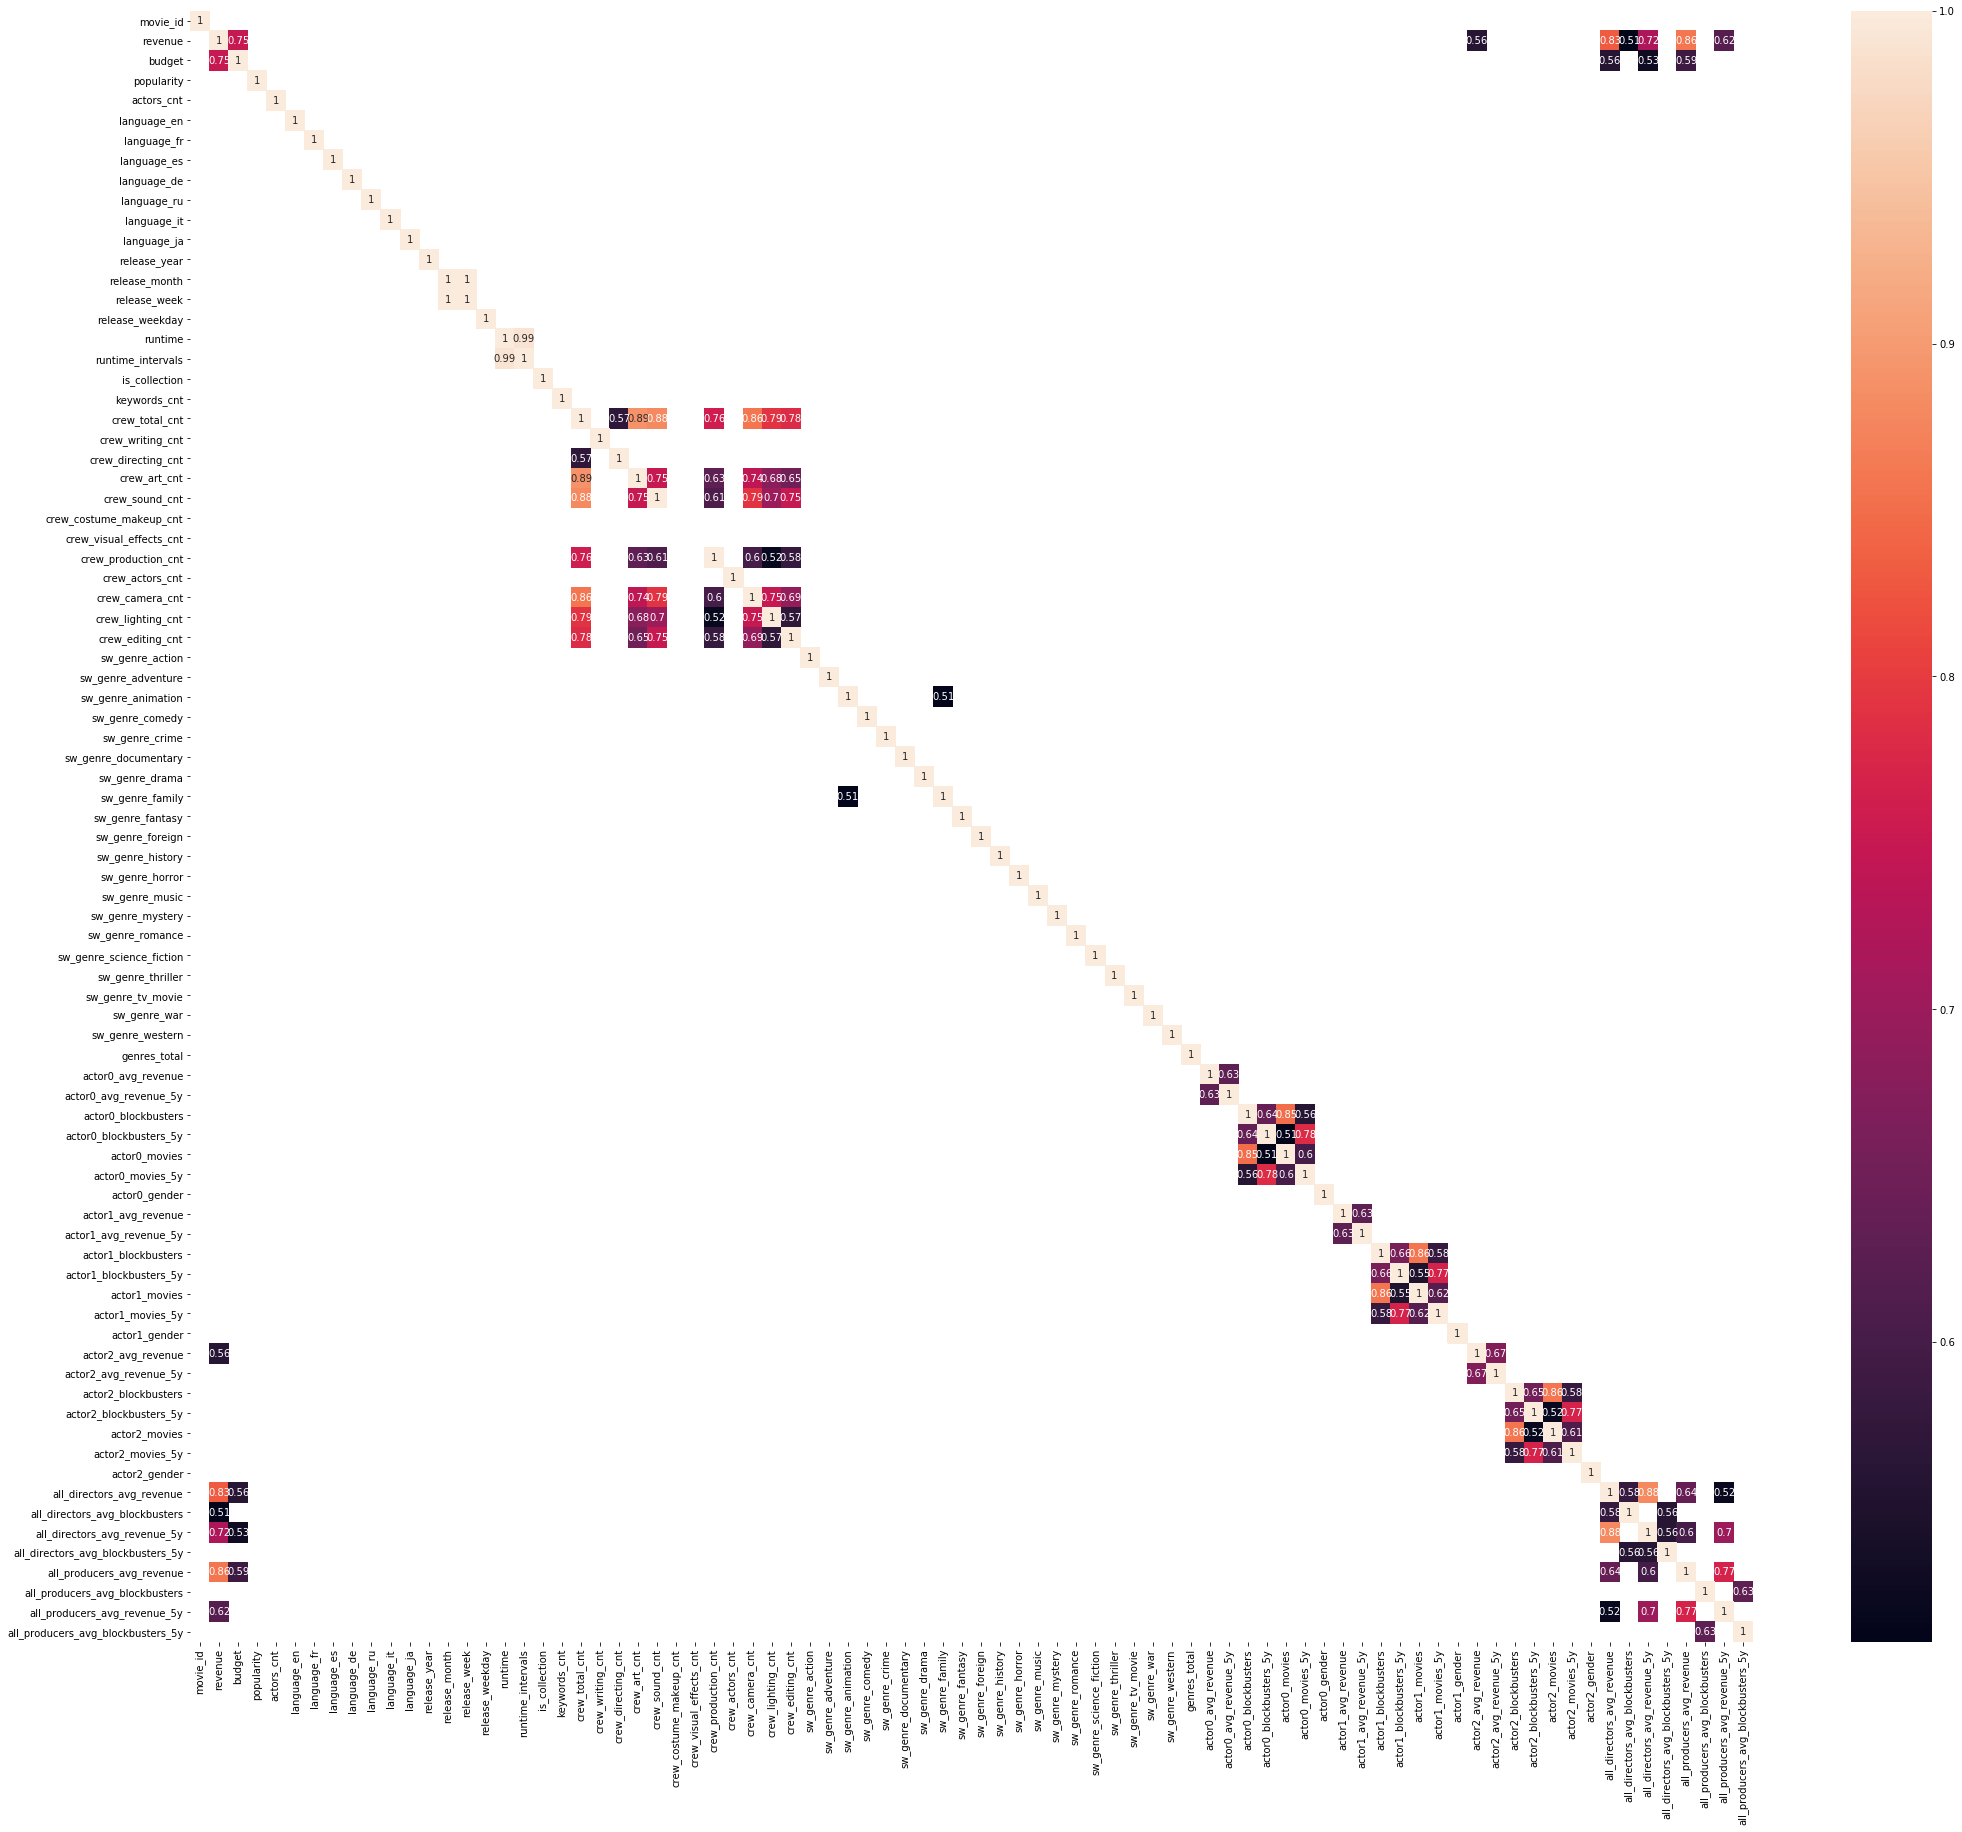

In [8]:
movies_corr_matrix = movies.corr().round(2)
kot = movies_corr_matrix[abs(movies_corr_matrix)>=.5]
plt.figure(figsize=(35,30))
sns.heatmap(kot, annot=True)
plt.show()


#### Corellation of outcome variable with all other variables: 

In [ ]:
pd.set_option('display.max_rows', None)
revenue_correlations = movies[movies.columns[1:]].corr()['revenue'][:]
revenue_correlations.sort_values(ascending=False)

#### 4. Describe the target variable (revenue) - how is it distributed? 
#### Are there categories that show a large difference in the distribution of the target variable?


              Distribution of revenue all movies and inside different categories (genre, runtime, release year) 

In [ ]:
plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(movies.revenue, hist=True, kde=True,  bins=int(150)).set_title("All movies")

f, axes = plt.subplots(2, 4, figsize=(12, 5), sharex=True)
sns.distplot(movies.revenue[movies.sw_genre_action == 1], hist=False, kde=True, ax=axes[0,0]).set_title("Action movies")
sns.distplot(movies.revenue[movies.sw_genre_drama == 1], hist=False, kde=True, ax=axes[0,1]).set_title("Drama movies")
sns.distplot(movies.revenue[movies.sw_genre_documentary == 1], hist=False, kde=True, ax=axes[0,2]).set_title("Documentary movies")
sns.distplot(movies.revenue[movies.sw_genre_animation == 1], hist=False, kde=True, ax=axes[0,3]).set_title("Animation movies")
sns.distplot(movies.revenue[movies.sw_genre_western == 1], hist=False, kde=True, ax=axes[1,0]).set_title("Western movies")
sns.distplot(movies.revenue[movies.sw_genre_family == 1], hist=False, kde=True, ax=axes[1,1]).set_title("Family movies")
sns.distplot(movies.revenue[movies.sw_genre_crime == 1], hist=False, kde=True, ax=axes[1,2]).set_title("Crime movies")
sns.distplot(movies.revenue[movies.sw_genre_foreign == 1], hist=False, kde=True, ax=axes[1,3]).set_title("Foreign movies")

f, axes = plt.subplots(1, 3, figsize=(12, 5), sharex=True)
sns.distplot(movies.revenue[movies.runtime_cat == 'Short'], hist=False, kde=True, ax=axes[0]).set_title("Short movies")
sns.distplot(movies.revenue[movies.runtime_cat == 'Intermediate'], hist=False, kde=True, ax=axes[1]).set_title("Intermediate movies")
sns.distplot(movies.revenue[movies.runtime_cat == 'Long'], hist=False, kde=True, ax=axes[2]).set_title("Long movies")


f, axes = plt.subplots(2, 4, figsize=(12, 5), sharex=True)
sns.distplot(movies.revenue[(movies.release_year > 1940) & (movies.release_year <= 1950)], hist=False, kde=True, ax=axes[0,0]).set_title("1940-1950")
sns.distplot(movies.revenue[(movies.release_year > 1950) & (movies.release_year <= 1960)], hist=False, kde=True, ax=axes[0,1]).set_title("1950-1960")
sns.distplot(movies.revenue[(movies.release_year > 1960) & (movies.release_year <= 1970)], hist=False, kde=True, ax=axes[0,2]).set_title("1960-1970")
sns.distplot(movies.revenue[(movies.release_year > 1970) & (movies.release_year <= 1980)], hist=False, kde=True, ax=axes[0,3]).set_title("1970-1980")
sns.distplot(movies.revenue[(movies.release_year > 1980) & (movies.release_year <= 1990)], hist=False, kde=True, ax=axes[1,0]).set_title("1980-1990")
sns.distplot(movies.revenue[(movies.release_year > 1990) & (movies.release_year <= 2000)], hist=False, kde=True, ax=axes[1,1]).set_title("1990-2000")
sns.distplot(movies.revenue[(movies.release_year > 2000) & (movies.release_year <= 2010)], hist=False, kde=True, ax=axes[1,2]).set_title("2000-2010")
sns.distplot(movies.revenue[(movies.release_year > 2010) & (movies.release_year <= 2020)], hist=False, kde=True, ax=axes[1,3]).set_title("2010-2020")


Looks like distribution of revenue is Poisson and the same for different categories

In [ ]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(np.log(movies.revenue+1), hist=True, kde=True,  bins=int(150))

#### 5. Create graphs that can help you check for extreme data. Describe them.

In [ ]:
plt.rc('figure', max_open_warning = 0)
from pandas.api.types import is_numeric_dtype
for column in movies:
    if is_numeric_dtype(movies[column]):
        plt.figure()
        movies.boxplot([column], vert=False, figsize=(3,4))

In [ ]:

movies_f = movies[['budget', 'all_directors_avg_revenue','all_producers_avg_revenue', 'actor2_avg_revenue']].copy()

plt.figure(figsize=(16, 10))
sns.boxplot(data=movies_f)

### There is a huge difference between the blockbusters and average movies in budgets, revenues, crew etc.

In [ ]:
### 6. Describe the missing data: Which variables have missing data? Some?

na_variables = movies.isna().sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(na_variables)

### There is a small amount of records (~20) with missing data in "runtime", "crew_..." and "sw_genres_..."  variables.
### There are more lack of data in calculated variables like "actor0_avg_revenue" and "all_directors_avg_revenue_5y".
### It seems normal because not all director or actor prticipated in movie that made revenue, in special during last 5 years
### All NaNs will be replaced with 0.    


In [ ]:
#### 7. Create a matrix of gaps (create a dataframe with the same dimensions from the source table and cells that are missing put a value of one and those that have data have a zero value). 
#### Show the matrix in the heatmap graph.

In [ ]:


### pip install missingno
import missingno as msno

### plot the missingness (nullity) matrix
missingdata_df = animals.columns[animals.isnull().any()].tolist()
msno.matrix(animals[missingdata_df])

plt.figure(figsize=(25,20))
sns.heatmap(movies.isnull(), cbar=False)



In [ ]:



###   Extreme data




In [ ]:
###### 1. In variables where extreme values are found, check the distribution of the variable with and without the extreme values. 
### Does the distribution change?


### Distribution of original budget and 'all directors average revenue'
### Distribution of budget and 'all directors average revenue' without outliers

movies_t = movies[['revenue', 'budget', 'all_directors_avg_revenue']].copy()
movies_t.insert(2, "budget_05", movies.budget[movies.budget.between(movies.budget.quantile(.05), movies.budget.quantile(.95))], True) 
movies_t.insert(3, "all_directors_avg_revenue_05", movies.all_directors_avg_revenue[movies.all_directors_avg_revenue.between(movies.all_directors_avg_revenue.quantile(.05), movies.all_directors_avg_revenue.quantile(.95))], True) 

f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.distplot(movies_t.budget , color="skyblue", ax=axes[0,0])
sns.distplot(movies_t.all_directors_avg_revenue , color="olive", ax=axes[0,1])
sns.distplot(movies_t.budget_05 , color="skyblue", ax=axes[1,0])
sns.distplot(movies_t.all_directors_avg_revenue_05 , color="olive", ax=axes[1,1])



In [ ]:
## 2. Create a scatter graph with the variables in the previous question in X and the target variable in Y. 
### Do extreme values in variable X affect the behavior of variable Y? Do you see differences with or without extreme values?

f, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=False)
sns.scatterplot(data = movies_t, x="budget", y="revenue" , color="skyblue", ax=axes[0,0])
sns.scatterplot(data = movies_t, x="all_directors_avg_revenue", y="revenue" , color="olive", ax=axes[0,1])
sns.scatterplot(data = movies_t, x="budget_05", y="revenue" , color="skyblue", ax=axes[1,0])
sns.scatterplot(data = movies_t, x="all_directors_avg_revenue_05", y="revenue" , color="olive", ax=axes[1,1])

In [ ]:
### 3. In what variables would you delete the extreme values? How would you delete them? Necrosis.

### ???


In [ ]:
### 4. Act on the data according to what you defined in the previous question.



In [ ]:
### Missing data
### For each variable with missing data, you will see the distribution of other variables with or without missing. 
### Use the missing matrix you created in part 2, question 7 for the missing / no indication. 
### For the distribution, use a histogram or density graph with category / color as indicated.

movies_nan_free = movies[['crew_total_cnt', 'genres_total']].copy()
movies_nan_free = movies_nan_free.dropna()
movies_nan_free.genres_total = movies_nan_free.genres_total.astype(int)

f, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=False)
sns.distplot(movies.crew_total_cnt, hist=False, color="skyblue", ax=axes[0,0])
sns.distplot(movies_nan_free.crew_total_cnt, hist=False, color="skyblue", ax=axes[0,1])
sns.distplot(movies.genres_total, hist=False, color="olive", ax=axes[1,0])
sns.distplot(movies_nan_free.genres_total, hist=False, color="olive", ax=axes[1,1])

### 

In [ ]:
movies = movies.dropna(subset=['crew_total_cnt','crew_writing_cnt','crew_directing_cnt','crew_art_cnt','crew_sound_cnt','crew_costume_makeup_cnt','crew_visual_effects_cnt','crew_production_cnt','crew_actors_cnt','crew_camera_cnt','crew_lighting_cnt','crew_editing_cnt'])
movies = movies.dropna(subset=['sw_genre_action','sw_genre_adventure','sw_genre_animation','sw_genre_comedy','sw_genre_crime','sw_genre_documentary','sw_genre_drama','sw_genre_family','sw_genre_fantasy','sw_genre_foreign','sw_genre_history','sw_genre_horror','sw_genre_music','sw_genre_mystery','sw_genre_romance','sw_genre_science_fiction','sw_genre_thriller','sw_genre_tv_movie','sw_genre_war','sw_genre_western','genres_total'])

movies = movies.fillna(0)



In [ ]:


movies.original_language = pd.Categorical(movies.original_language)
movies.language_en = pd.Categorical(movies.language_en)
movies.language_fr = pd.Categorical(movies.language_fr)
movies.language_es = pd.Categorical(movies.language_es)
movies.language_de = pd.Categorical(movies.language_de)
movies.language_ru = pd.Categorical(movies.language_ru)
movies.language_it = pd.Categorical(movies.language_it)
movies.language_ja = pd.Categorical(movies.language_ja)
movies.runtime_intervals = pd.Categorical(movies.runtime_intervals)
movies.runtime_cat = pd.Categorical(movies.runtime_cat)
movies.is_collection = pd.Categorical(movies.is_collection)
movies.sw_genre_action = pd.Categorical(movies.sw_genre_action)
movies.sw_genre_adventure = pd.Categorical(movies.sw_genre_adventure)
movies.sw_genre_animation = pd.Categorical(movies.sw_genre_animation)
movies.sw_genre_comedy = pd.Categorical(movies.sw_genre_comedy)
movies.sw_genre_crime = pd.Categorical(movies.sw_genre_crime)
movies.sw_genre_documentary = pd.Categorical(movies.sw_genre_documentary)
movies.sw_genre_drama = pd.Categorical(movies.sw_genre_drama)
movies.sw_genre_family = pd.Categorical(movies.sw_genre_family)
movies.sw_genre_fantasy = pd.Categorical(movies.sw_genre_fantasy)
movies.sw_genre_foreign = pd.Categorical(movies.sw_genre_foreign)
movies.sw_genre_history = pd.Categorical(movies.sw_genre_history)
movies.sw_genre_horror = pd.Categorical(movies.sw_genre_horror)
movies.sw_genre_music = pd.Categorical(movies.sw_genre_music)
movies.sw_genre_mystery = pd.Categorical(movies.sw_genre_mystery)
movies.sw_genre_romance = pd.Categorical(movies.sw_genre_romance)
movies.sw_genre_science_fiction = pd.Categorical(movies.sw_genre_science_fiction)
movies.sw_genre_thriller = pd.Categorical(movies.sw_genre_thriller)
movies.sw_genre_tv_movie = pd.Categorical(movies.sw_genre_tv_movie)
movies.sw_genre_war = pd.Categorical(movies.sw_genre_war)
movies.sw_genre_western = pd.Categorical(movies.sw_genre_western)
movies.actor0_gender = pd.Categorical(movies.actor0_gender)
movies.actor1_gender = pd.Categorical(movies.actor1_gender)
movies.actor2_gender = pd.Categorical(movies.actor2_gender)

movies.release_year = movies.release_year.astype(int)
movies.release_month = movies.release_month.astype(int)
movies.release_week = movies.release_week.astype(int)
movies.release_weekday = movies.release_weekday.astype(int)
movies.runtime = movies.runtime.astype(int)
movies.crew_total_cnt = movies.crew_total_cnt.astype(int)
movies.crew_actors_cnt = movies.crew_actors_cnt.astype(int)
movies.crew_art_cnt = movies.crew_art_cnt.astype(int)
movies.crew_camera_cnt = movies.crew_camera_cnt.astype(int)
movies.crew_costume_makeup_cnt = movies.crew_costume_makeup_cnt.astype(int)
movies.crew_directing_cnt = movies.crew_directing_cnt.astype(int)
movies.crew_editing_cnt = movies.crew_editing_cnt.astype(int)
movies.crew_lighting_cnt = movies.crew_lighting_cnt.astype(int)
movies.crew_production_cnt = movies.crew_production_cnt.astype(int)
movies.crew_sound_cnt = movies.crew_sound_cnt.astype(int)
movies.crew_visual_effects_cnt = movies.crew_visual_effects_cnt.astype(int)
movies.crew_writing_cnt = movies.crew_writing_cnt.astype(int)
movies.genres_total = movies.genres_total.astype(int)
movies.actor0_movies = movies.actor0_movies.astype(int)
movies.actor0_movies_5y = movies.actor0_movies_5y.astype(int)
movies.actor0_blockbusters = movies.actor0_blockbusters.astype(int)
movies.actor0_blockbusters_5y = movies.actor0_blockbusters_5y.astype(int)
movies.actor1_movies = movies.actor1_movies.astype(int)
movies.actor1_movies_5y = movies.actor1_movies_5y.astype(int)
movies.actor1_blockbusters = movies.actor1_blockbusters.astype(int)
movies.actor1_blockbusters_5y = movies.actor1_blockbusters_5y.astype(int)
movies.actor2_movies = movies.actor2_movies.astype(int)
movies.actor2_movies_5y = movies.actor2_movies_5y.astype(int)
movies.actor2_blockbusters = movies.actor2_blockbusters.astype(int)
movies.actor2_blockbusters_5y = movies.actor2_blockbusters_5y.astype(int)
movies.all_directors_avg_blockbusters = movies.all_directors_avg_blockbusters.astype(int)
movies.all_directors_avg_blockbusters_5y = movies.all_directors_avg_blockbusters_5y.astype(int)
movies.all_producers_avg_blockbusters= movies.all_producers_avg_blockbusters.astype(int)
movies.all_producers_avg_blockbusters_5y = movies.all_producers_avg_blockbusters_5y.astype(int)

